In [1]:
# Import Tensorflow 2.0
# %tensorflow_version 2.x
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm
import data_loader.util as util

# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
# assert len(tf.config.list_physical_devices('GPU')) > 0

In [2]:
#Downloading data from tf keras dataset
mnist_data = tf.keras.datasets.mnist.load_data()
(train_images, train_labels), (test_images, test_labels)= mnist_data
print(train_images.shape,train_labels.shape,test_images.shape,test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
#Data processing for model feeding
train_images = (np.expand_dims(train_images,axis = -1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.float64)

In [4]:
print(type(test_labels[0]),type(test_labels[0]))

<class 'numpy.uint8'> <class 'numpy.uint8'>


In [5]:
test_images = (np.expand_dims(test_images,axis = -1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.float64)
print(train_images.shape,train_labels.shape,test_images.shape,test_labels.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [6]:
print(type(test_labels[0]),type(test_labels[0]))

<class 'numpy.float64'> <class 'numpy.float64'>


In [7]:
print(train_images.shape, train_labels.shape,test_images.shape, test_labels.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


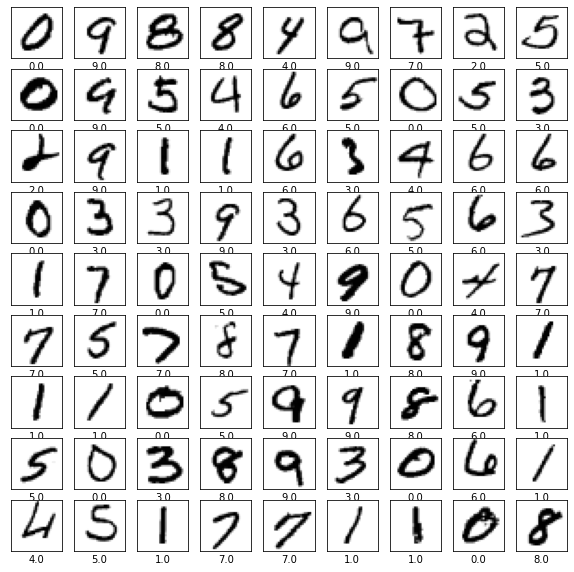

In [8]:
util.visualize_data(train_images,train_labels,number_data_to_show=81)

In [9]:
import model_loader.model as m_loader
import model_loader.configure as model_config

In [10]:
model = m_loader.build_cnn_model()

In [11]:
import os
checkpoint_path = "./training_1/Epoch_{epoch:02d}_train_loss_{loss}_Val_loss{val_loss}.hdf5"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [12]:
model.compile(optimizer=model_config.optimizer, loss=model_config.loss, metrics=model_config.metrics)

In [13]:
model.fit(train_images, train_labels, batch_size=model_config.BATCH_SIZE, epochs=model_config.EPOCHS,validation_data=(test_images, test_labels),
          callbacks=[cp_callback])

Epoch 1/100
938/938 [==============================] - 16s 16ms/step - loss: 0.1831 - accuracy: 0.9455 - val_loss: 0.0574 - val_accuracy: 0.9814
Epoch 2/100
938/938 [==============================] - 16s 17ms/step - loss: 0.0532 - accuracy: 0.9836 - val_loss: 0.0430 - val_accuracy: 0.9859
Epoch 3/100
938/938 [==============================] - 16s 17ms/step - loss: 0.0382 - accuracy: 0.9879 - val_loss: 0.0422 - val_accuracy: 0.9866
Epoch 4/100
938/938 [==============================] - 16s 17ms/step - loss: 0.0283 - accuracy: 0.9909 - val_loss: 0.0365 - val_accuracy: 0.9884
Epoch 5/100
938/938 [==============================] - 16s 17ms/step - loss: 0.0218 - accuracy: 0.9929 - val_loss: 0.0383 - val_accuracy: 0.9882
Epoch 6/100
938/938 [==============================] - 16s 17ms/step - loss: 0.0175 - accuracy: 0.9944 - val_loss: 0.0337 - val_accuracy: 0.9896
Epoch 7/100
938/938 [==============================] - 16s 17ms/step - loss: 0.0141 - accuracy: 0.9952 - val_loss: 0.0331 - val_ac

Epoch 57/100
938/938 [==============================] - 27s 29ms/step - loss: 1.2641e-06 - accuracy: 1.0000 - val_loss: 0.0705 - val_accuracy: 0.9911
Epoch 58/100
938/938 [==============================] - 27s 29ms/step - loss: 9.0010e-07 - accuracy: 1.0000 - val_loss: 0.0706 - val_accuracy: 0.9914
Epoch 59/100
938/938 [==============================] - 27s 29ms/step - loss: 6.4575e-07 - accuracy: 1.0000 - val_loss: 0.0712 - val_accuracy: 0.9916
Epoch 60/100
938/938 [==============================] - 27s 29ms/step - loss: 4.5396e-07 - accuracy: 1.0000 - val_loss: 0.0716 - val_accuracy: 0.9914
Epoch 61/100
938/938 [==============================] - 27s 29ms/step - loss: 3.1525e-07 - accuracy: 1.0000 - val_loss: 0.0723 - val_accuracy: 0.9915
Epoch 62/100
938/938 [==============================] - 27s 29ms/step - loss: 2.1362e-07 - accuracy: 1.0000 - val_loss: 0.0733 - val_accuracy: 0.9915
Epoch 63/100
938/938 [==============================] - 27s 29ms/step - loss: 1.3857e-07 - accuracy:

KeyboardInterrupt: 

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0829 - accuracy: 0.9920
Test Accuracy 0.9919999837875366
